<a href="https://colab.research.google.com/github/celineyayifeng/ds6001/blob/main/Group16_DS5100_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import unittest

from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pylab import savefig

In [ ]:
data = pd.read_csv('diabetes.csv')

# check all the columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
def cleanZeros(df, exclusions=None):
    exclusions = [] if exclusions is None else exclusions
    for (columnName, columnData) in df.iteritems():
        if (columnName not in exclusions):
            df = df[df[columnName]>0]
    return df

In [ ]:
def test_cleanZeros():
    
        cleaned_df = cleanZeros(data, exclusions = ['Pregnancies','Outcome'])
        counts = 0
        for i in cleaned_df['Glucose']:
            if i == 0:
                counts += 1 
  
        expected = 0 

        assert counts == expected

if __name__ == "__main__":
    test_cleanZeros()
    print("Everything passed")

Everything passed


In [ ]:
data = cleanZeros(data, ['Pregnancies', 'Outcome'])
data.shape

(392, 9)

In [ ]:
def find_mean_outcome(df, predictor_variable, outcome_variable):
  new_df = df.groupby(outcome_variable).mean()
  return new_df[predictor_variable]

test_df = pd.DataFrame({'a':[1,2,3,4], 'b':[0,1,0,1]})

def test_find_mean_outcome():

  test_mean_df = find_mean_outcome(test_df, 'a', 'b')
  test_mean_count = test_mean_df.iloc[0]

  expected = 2

  assert test_mean_count == expected

if __name__ == "__main__":
    test_find_mean_outcome()
    print("Everything passed")

Everything passed


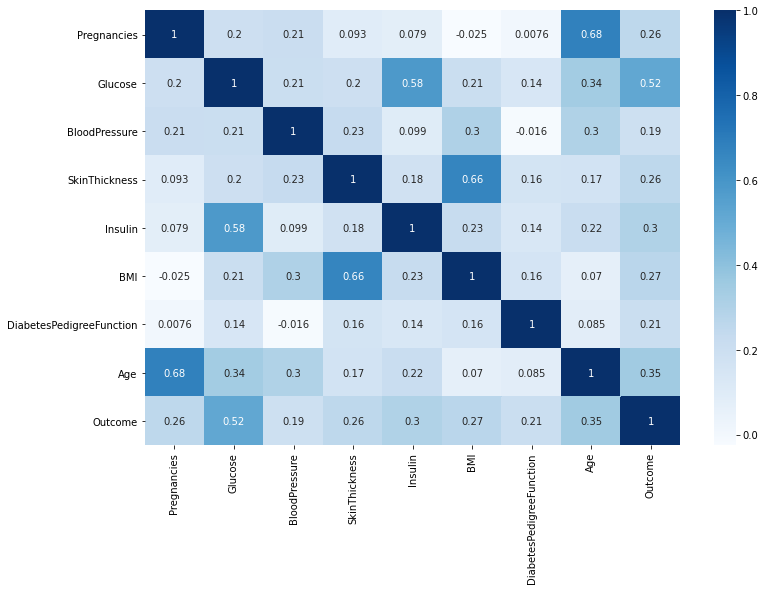

In [ ]:
# Get correlations of each features in dataset

corr = data.corr()

top_corr_features = corr.index
plt.figure(figsize=(12,8))

# Plot heatmap

g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="Blues")

In [ ]:
figure = g.get_figure()    
figure.savefig('heatmap.png', dpi=400)

In [ ]:
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.515703
Age                         0.350804
Insulin                     0.301429
BMI                         0.270118
Pregnancies                 0.256566
SkinThickness               0.255936
DiabetesPedigreeFunction    0.209330
BloodPressure               0.192673
Name: Outcome, dtype: float64

In [ ]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


In [ ]:
print(find_mean_outcome(data, 'Glucose', 'Outcome'))

Outcome
0    111.431298
1    145.192308
Name: Glucose, dtype: float64


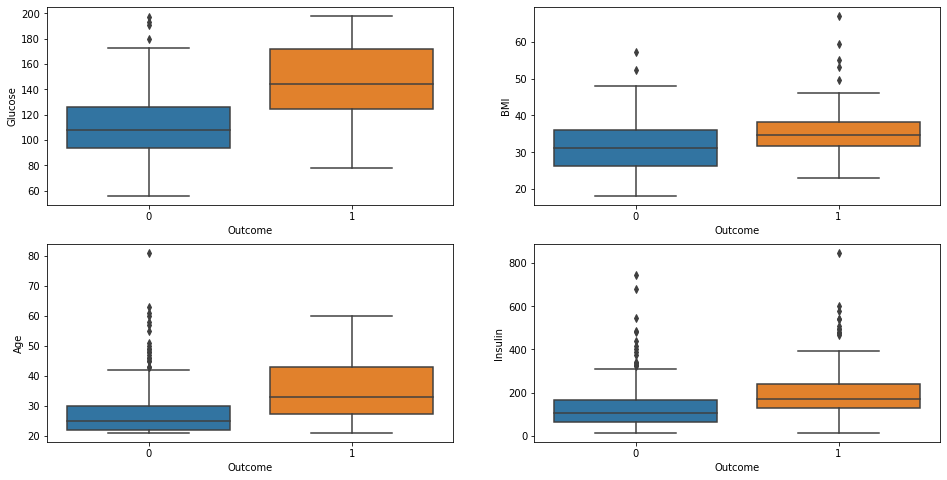

In [ ]:
# Plotting all the subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (16,8))
sns.boxplot(x='Outcome', y='Glucose', data=data, ax=axs[0,0])
#sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0,1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
sns.boxplot(x='Outcome', y='BMI', data=data, ax=axs[0,1])
sns.boxplot(x='Outcome', y='Insulin', data=data, ax=axs[1,1])
sns.boxplot(x='Outcome', y='Age', data=data, ax=axs[1,0])

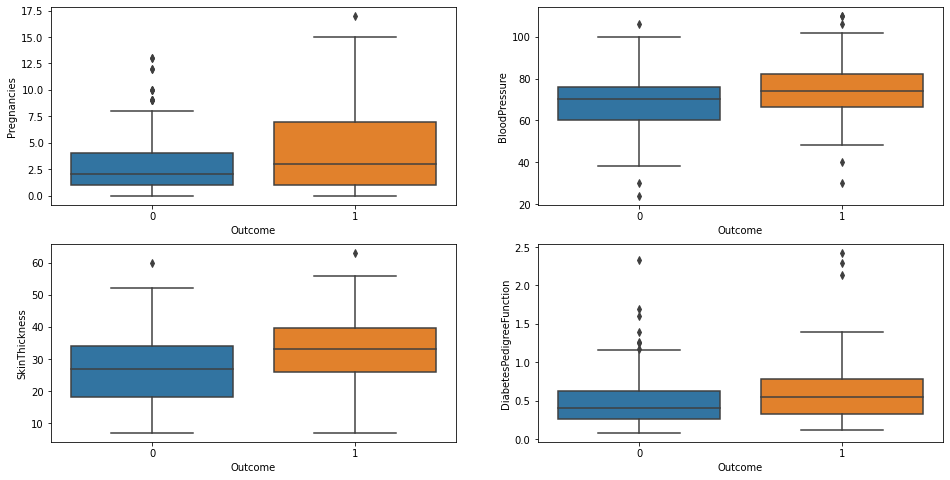

In [ ]:
# Plotting all the subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (16,8))
sns.boxplot(x='Outcome', y='Pregnancies', data=data, ax=axs[0,0])
#sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0,1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
sns.boxplot(x='Outcome', y='BloodPressure', data=data, ax=axs[0,1])
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=data, ax=axs[1,1])
sns.boxplot(x='Outcome', y='SkinThickness', data=data, ax=axs[1,0])

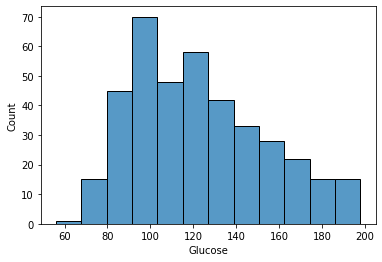

In [ ]:
sns.histplot(data['Glucose'])

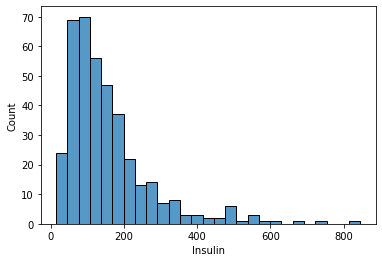

In [ ]:
sns.histplot(data['Insulin'])

Logistic Regression

In [ ]:
#separate independent and dependent variables
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
#create training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=3)


In [ ]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [ ]:
LR=LogisticRegression(C=1,penalty='l2')
LR.fit(X_train,y_train)

print("Test Set Accuracy:"+str(metrics.accuracy_score(y_test,LR.predict(X_test))*100))

score = metrics.accuracy_score(y_test,LR.predict(X_test))


Test Set Accuracy:77.11864406779661


[[71 12]
 [15 20]]


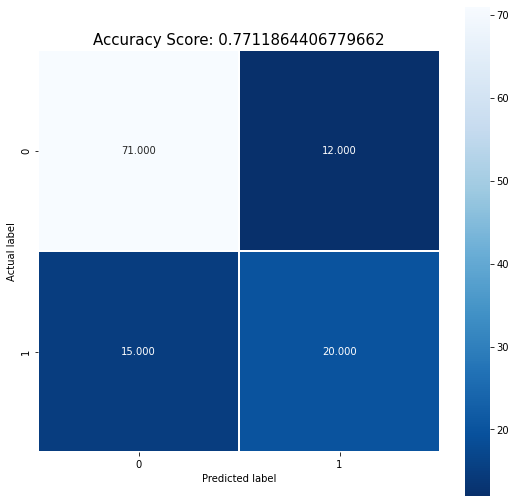

In [ ]:
#confusion matrix to test for accuracy

y_predict = LR.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


Text(0.5, 0, 'Importance')

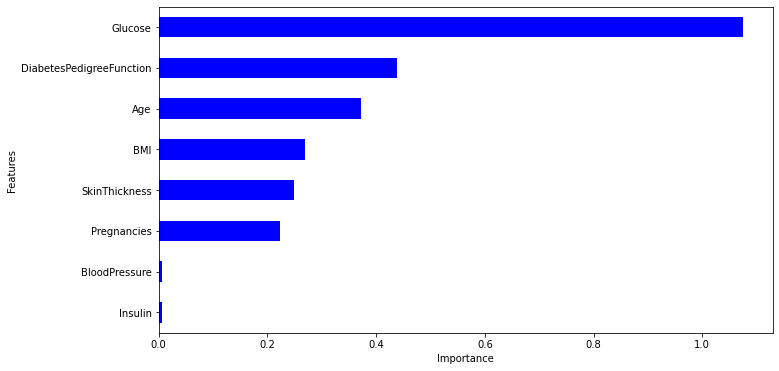

In [ ]:
coeff = list(LR.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'orange'}))
plt.xlabel('Importance')

In [ ]:
X = add_constant(data)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                       62.822822
Pregnancies                  1.912621
Glucose                      1.939119
BloodPressure                1.231818
SkinThickness                1.854913
Insulin                      1.557621
BMI                          2.009136
DiabetesPedigreeFunction     1.079602
Age                          2.154163
Outcome                      1.528522
dtype: float64

In [ ]:
# no skill prediction
ns_probs = [0 for _ in range(len(y_test))]
# predict probs
lr_probs = LR.predict_proba(X_test)
# only keep probabilities for positive outcome
lr_probs = lr_probs[:, 1]

# auc scores
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
lr_auc = metrics.roc_auc_score(y_test, lr_probs)

print(ns_auc)
print(lr_auc)

0.5
0.8554216867469879


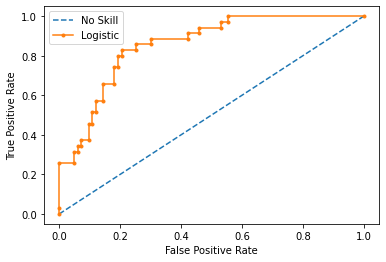

<Figure size 432x288 with 0 Axes>

In [ ]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

References
 
   Title: Logistic Regression using Python
*    Author: Galarnyk, M
*    Date: 2017
*    Code version: 1.0
*    Availability: https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-*a6b31e2b166a*

